# Assignment #3

# 1. K-means from scratch (50 points)

Code up the K-means algorithm. To test your code, sample from the three bivariate Gaussian distributions provided below and find three clusters from this sampled data. To initialize your algorihtm, you may use the initial centroids defined below. After predicting the cluster to which each data point belongs, make a scatter plot similar to the one shown below. For consistency, set the random seed to 1 before sampling from the three bivariate Gaussian distributions.

* Bivariate Gaussians
$$\mathbf{\mu_1} = \begin{bmatrix}
3.0\\
1.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-1.0\\
3.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-5.0\\
2.0\\
\end{bmatrix}$$

$$\mathbf{\Sigma_1} = \mathbf{\Sigma_2} = \mathbf{\Sigma_3}\begin{bmatrix}
0.9&0.3\\
0.3&0.9\\
\end{bmatrix}$$

* Initial centroids:
$$\mathbf{c_1} = \begin{bmatrix}
0.4\\
0.3\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
0.1\\
0.4\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
-2.0\\
2.0\\
\end{bmatrix}$$

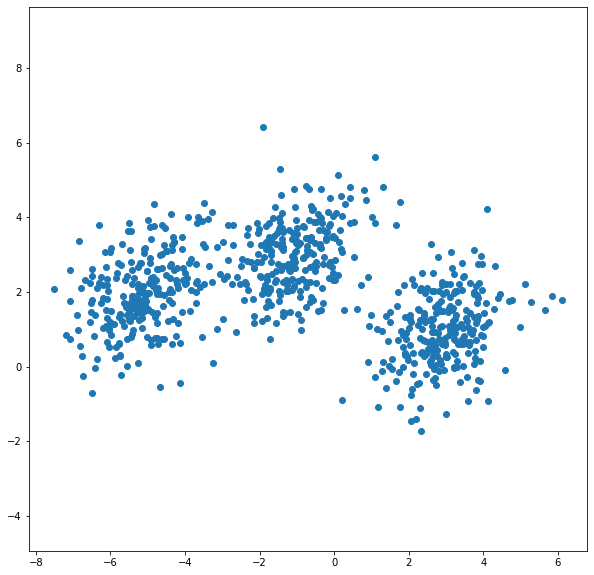

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Sample data from three bivariate Gaussian distributions
mean1 = [3, 1]
mean2 = [-1, 3]
mean3 = [-5, 2]
cov = [[0.9, 0.3], [0.3, 0.9]] 

data1 = np.random.multivariate_normal(mean1, cov, 250)
data2 = np.random.multivariate_normal(mean2, cov, 250)
data3 = np.random.multivariate_normal(mean3, cov, 250)
X = np.concatenate((data1, data2, data3),axis=0)

# Let's plot the synthetic clusters
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

In [2]:
# Initialize centroids
initial_centroids = np.array([[0.4, 0.3], [0.1, 0.4], [-2, 2]])

# calculate distance btw two points 
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def calculate_centroid(points):
    return np.array(points).mean(axis =0)
        

def k_means(k, points):
    # Initialization: choose k centroids (Forgy, Random Partition, etc.)
    centroids = initial_centroids
    
    # Initialize clusters list
    clusters = [[] for _ in range(k)]
    
    # Loop until convergence
    converged = False
    while not converged:
        # Clear previous clusters
        clusters = [[] for _ in range(k)]
    
        # Assign each point to the "closest" centroid 
        for point in points:
            distances_to_each_centroid = [distance(point, centroid) for centroid in centroids]
            cluster_assignment = np.argmin(distances_to_each_centroid)
            clusters[cluster_assignment].append(point)
        
        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a
        #     cluster to determine the new centroid)
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]
        
        converged = np.array_equal(new_centroids, centroids)
        centroids = new_centroids
        if converged:
            return clusters,np.array(centroids)
    

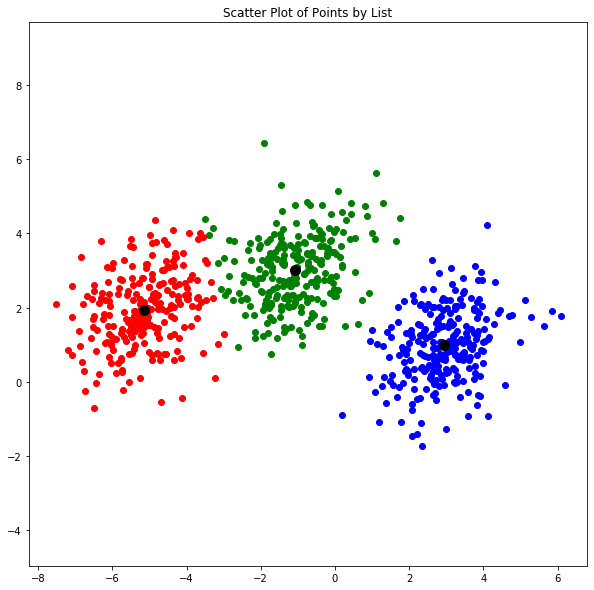

In [3]:
k = 3
pred, final_centroids = k_means(k,X)

# Define a list of colors for the different groups (you can also use markers or both)
colors = ['blue', 'green', 'red']

# Plot each list of points
plt.figure(figsize=(10,10))
for i, points in enumerate(pred):
    x_values = [point[0] for point in points]  # Extract x-coordinates
    y_values = [point[1] for point in points]  # Extract y-coordinates
    
    # Plot the points
    plt.scatter(x_values, y_values, color=colors[i], label=f'List {i + 1}')

# Add labels and a legend
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='k', s=100, label='Centroids')
plt.title('Scatter Plot of Points by List')
plt.axis('equal')
plt.show()

# 2. Predicting soil taxonomy (50 pts)

In the United States, soils are classified using the [USDA soil taxonomy](https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/nrcs142p2_051232.pdf). Within the USDA soil taxonomy, the most general level is the taxonomic order. In this problem we will be using a suite of decision-tree based classification algorithms to create spatial maps of taxonomic order over western Illinois. The point observations come from the [NASIS database](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/tools/?cid=nrcs142p2_053552) while the environmental predictors come from Sentinel 2, the National Elevation Data, and the National Land Cover database.

All the data has already been subsetted and preprocessed and are compiled in the following NetCDF file `/data/HW/HW3.nc`. The file is split into two groups: predictors and observations. The predictors group contains a set of 1 arcsec maps for the domain and the observations group contains the in-situ taxonomic order observations with their associated geographic coordinates. Although not required, we recommend using xarray to read in these data. 


**A.** Read in and create maps of all the predictors. Describe any apparent discrepancies in spatial resolution between the maps.

In [1]:
import netCDF4 as nc
import numpy as np
path = "/data/HW/HW3.nc"
fp = nc.Dataset(path,'r')

var = ['lat', 'lon', 'elevation', 'ndvi', 'evi', 'red', 'green', 'blue', 'tree_cover_fraction', 'gamma_uranium', 'gamma_thorium', 'gamma_potassium']
pred = {}

# extract data 
for v in var:
    if v == "lat" or v == "lon":
        continue
    pred[v] = fp['predictors'][v][:]

In [2]:
lat = fp['predictors']['lat'][:]
lon = fp['predictors']['lon'][:]
(pred['lon'],pred['lat']) = np.meshgrid(lon,lat)

elevation (1080, 1080)
ndvi (1080, 1080)
evi (1080, 1080)
red (1080, 1080)
green (1080, 1080)
blue (1080, 1080)
tree_cover_fraction (1080, 1080)
gamma_uranium (1080, 1080)
gamma_thorium (1080, 1080)
gamma_potassium (1080, 1080)
lon (1080, 1080)
lat (1080, 1080)


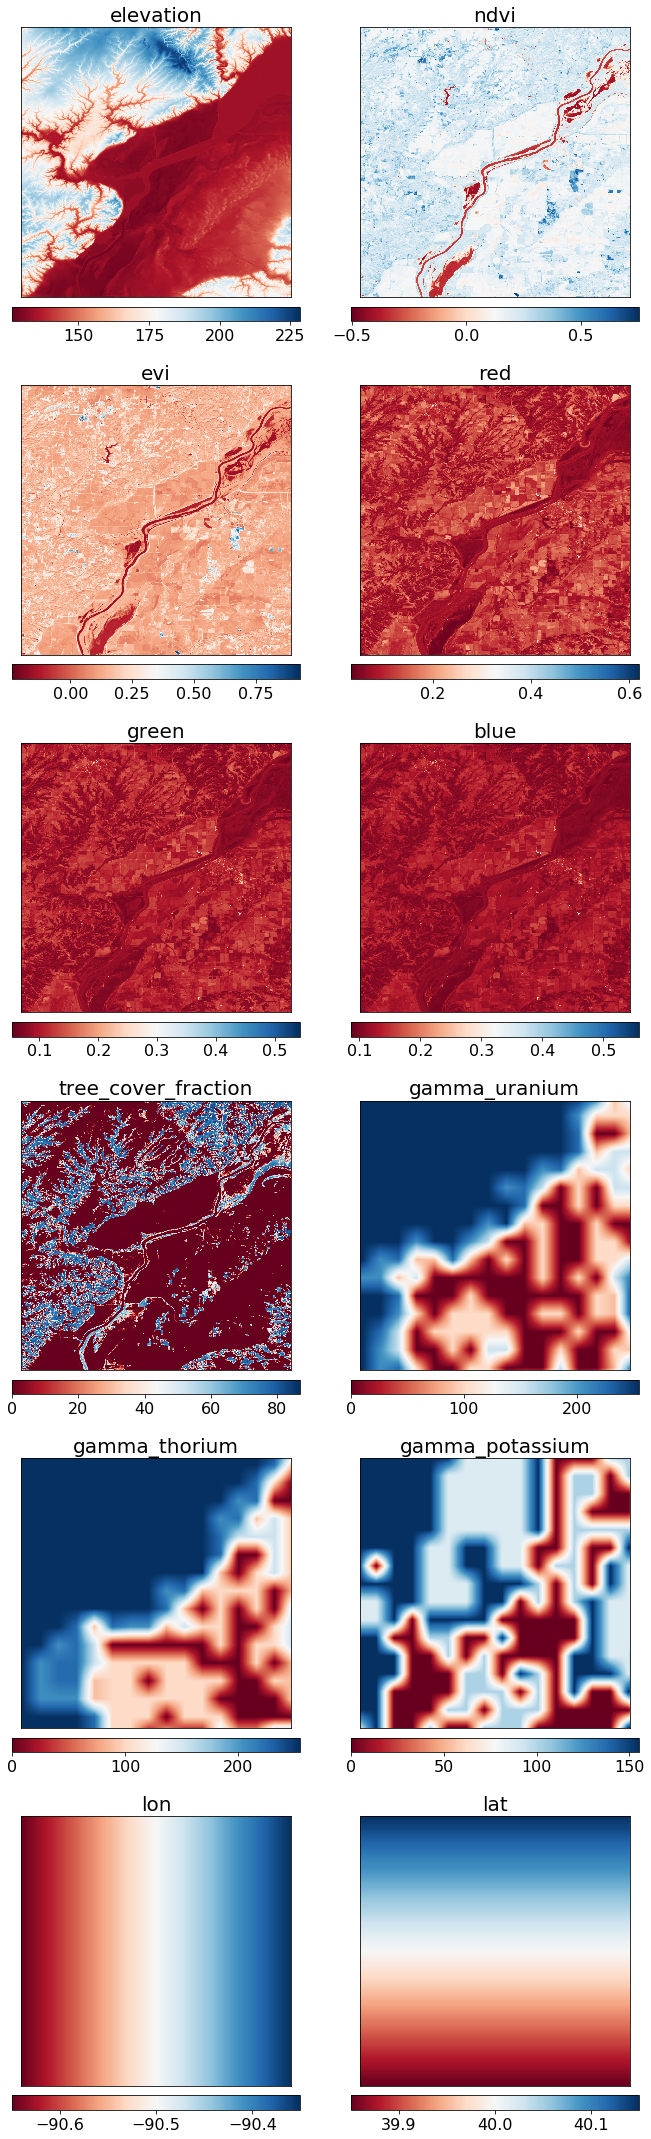

In [3]:
#Plot all the data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,30))
i = 0
for var in pred:
    i += 1
    print(var,pred[var].shape)
    plt.subplot(6,2,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.flipud(pred[var]),cmap = plt.get_cmap('RdBu'))
    cb = plt.colorbar(orientation='horizontal',shrink = 0.8, pad = 0.03)
    cb.ax.tick_params(labelsize=16)
    plt.title(var,fontsize=20)
plt.tight_layout()
plt.show()

Apparently, the chemical maps (gamma of uranium, thorium, and potassium) have a much coarser resolution than the others. The products developed from satellite images (spectral bands, NDVI, and EVI) have the finest resolution, showing more granular features and details compared to the elevation map. Latitude and longitude exhibit continuous variation. 

The concentration of the three chemicals seems to be correlated with elevation, as areas with higher elevation tend to have lower concentrations of these chemicals.

**B.** Read in the in-situ observations and assemble the corresponding predictors for each site. Create the $\mathbf{X}$ array of predictors and the $\mathbf{y}$ array of observed taxonomic orders. Note that you will need to convert the taxonomic order names to integers.

In [4]:
orders = {
    "alfisols" : 1, 
    "andisols" : 2, 
    "aridisols" : 3, 
    "entisols" : 4, 
    "gelisols" : 5, 
    "histosols" : 6, 
    "inceptisols" : 7, 
    "mollisols" : 8, 
    "oxisols" : 9, 
    "spodosols" : 10, 
    "ultisols" : 11, 
    "vertisols" : 12
}
# convert order name to integers 
ob_lat = fp['observations']['lat'][:]
ob_lon = fp['observations']['lon'][:]
ob_order = fp['observations']['taxonomic_order'][:]
Y = ob_n = np.array([orders[order] for order in ob_order])

In [5]:
# get the coordinate index of each observation 
ob_ilat = np.array([int(np.argmin(np.abs(lat - y))) for y in ob_lat])
ob_ilon = np.array([int(np.argmin(np.abs(lon - x))) for x in ob_lon])

In [6]:
obs = []
pred_all = []
for var in pred:
    obs_pred = np.array([pred[var][ob_ilat[i],ob_ilon[i]] for i in range(ob_n.size)])
    obs.append(obs_pred)
    pred_all.append(pred[var].reshape(pred[var].size))
# predictors for observation sites 
X = np.array(obs).T
# predictors for each pixel 
pred_all = np.array(pred_all).T

**C.** Use the validation set approach to divide your data into training and test datasets. The training dataset should 20% of the data. Then fit a Decision tree using the training data and evaluate its accuracy for both the training and test datasets. Explain the differences in accuracy when evaluating the training and test datasets. To ensure reproduceability, when initializing the decision tree, set the random_state to 1.

In [7]:
np.random.seed(1)
# 20% are validation, and 80% are training 
idx = np.random.choice(Y.size,int(153*0.8))
m = np.zeros(Y.size).astype(np.int)
m[idx] = 1
m = m.astype(np.bool)

In [8]:
import sklearn.tree 
#Decision tree
clf = sklearn.tree.DecisionTreeClassifier(random_state = 1)
#Fit the tree
clf = clf.fit(X[m,:],Y[m])
#Assess the accuracy 
print('Training Accuracy:',clf.score(X[m,:],Y[m]))
print('Validation Accuracy:',clf.score(X[~m,:],Y[~m]))

Training Accuracy: 1.0
Validation Accuracy: 0.6231884057971014


The training accuracy is much higher than the validation accuracy because the model is trained on the training set, which tends to maximize training accuracy. Validation samples contain more variation, which may reduce the overall accuracy.

**D.** Using  all the site data, perform a 10-fold cross validation of the decision tree and compare the results to the previous exercise. Set random_state to 1 and set shuffle to True.

In [9]:
import sklearn.model_selection
clf = sklearn.tree.DecisionTreeClassifier(random_state = 1)
k = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
scores = sklearn.model_selection.cross_val_score(clf,X,Y,cv=k)
print("10-fold cross validation - single decision tree: ", np.mean(scores))

10-fold cross validation - single decision tree:  0.67375


The accuracy was improved by introducing more decision trees and using only parts of observations. 

**E.** Setting the number of decision trees to 100, perform a 10-fold cross validation using Bagging, Random Forests, Gradient Boosting, and Multilayer Perceptrons (ANNs). Discuss how the results of these different ensemble methods vary amongst themselves. Also compare the results to those obtained from a single decision tree. Remember to set random_state to 1.


question: shuffle?

In [10]:
rs = 1 #random state
n_trees = 100 #number of trees 
k = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state = rs) #10-fold cross validation
clf = sklearn.tree.DecisionTreeClassifier(random_state = rs) #decision tree method 

In [11]:
import sklearn.ensemble
import sklearn.neural_network
import warnings

warnings.simplefilter("ignore")

# Bagging 
bclf = sklearn.ensemble.BaggingClassifier(
    base_estimator=clf,
    n_estimators=n_trees, 
    random_state=rs)

# Random Forest 
rfclf = sklearn.ensemble.RandomForestClassifier(
    n_estimators=n_trees,
    oob_score=True, 
    random_state=rs)

# Gradient Boosting
gbclf = sklearn.ensemble.GradientBoostingClassifier(
    n_estimators=n_trees, 
    random_state=rs)

# Multilayer Perceptron (Artificial Neural Network)
mlpclf = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes = n_trees, 
    random_state=rs)

# Perform 10-fold cross-validation and get the mean accuracy for each model
models = {
    'Decision Tree': clf,
    'Bagging': bclf,
    'Random Forest': rfclf,
    'Gradient Boosting': gbclf,
    'MLP (ANN)': mlpclf
}

# Dictionary to store results
results = {}


# Cross-validate each model and store the mean accuracy
for model_name, model in models.items():
    cv_scores = sklearn.model_selection.cross_val_score(model, X, Y, cv=k)
    results[model_name] = np.mean(cv_scores)
    print(f"{model_name} - Mean Accuracy: {results[model_name]}")

# Print final comparison of results
print("\nModel Performance Comparison:")
for model_name, mean_accuracy in results.items():
    print(f"{model_name}: {mean_accuracy:.4f}")



Decision Tree - Mean Accuracy: 0.67375
Bagging - Mean Accuracy: 0.70625
Random Forest - Mean Accuracy: 0.7658333333333334
Gradient Boosting - Mean Accuracy: 0.7250000000000001
MLP (ANN) - Mean Accuracy: 0.6950000000000001

Model Performance Comparison:
Decision Tree: 0.6737
Bagging: 0.7063
Random Forest: 0.7658
Gradient Boosting: 0.7250
MLP (ANN): 0.6950


Among all the models, the Random Forest provided the best accuracy based on 10-fold cross-validation. The single decision tree resulted in the worst performance. All the ensemble models performed better because they are composed of multiple decision trees built using randomly selected samples and/or features. The introduction of randomness improved the model's performance.

**F.** Using 100 trees, fit a Random Forest to the entire sites dataset and report the out of bag score. Compare that result to that obtained from the cross validation. Explain what the out of bag score is and how it can be more useful than cross validation. Remember to set random_state to 1.

In [12]:
# Random Forest 
rfclf = sklearn.ensemble.RandomForestClassifier(
    n_estimators=n_trees,
    oob_score=True, 
    random_state=rs)
rfclf.fit(X,Y)
cv_score = sklearn.model_selection.cross_val_score(rfclf, X, Y, cv=k)
#Print out of bag estimate of accuracy
print("Out of bag estimate of accuracy: ", rfclf.oob_score_)
print("10-fold cross validation estimate of accuracy: ", np.mean(cv_score))

Out of bag estimate of accuracy:  0.7450980392156863
10-fold cross validation estimate of accuracy:  0.7658333333333334


The out-of-bag (OOB) score is the accuracy calculated from samples that were not used as training data while generating the Random Forest model. It leverages the bootstrap sampling technique used during training and provides an estimate of the model’s generalization ability without requiring an explicit test set or cross-validation.

OOB can be more useful than cross-validation because it saves time and computational resources needed for a separate validation. Since the OOB samples are already excluded from the training of each tree, they serve as a built-in validation set, eliminating the need for multiple iterations and resulting in higher efficiency.

**G.** Starting from 10 to 100 decision trees per Random Forest, determine the optimal number of decision trees. 

In [13]:
warnings.simplefilter("ignore")

trees = np.arange(10, 101)
scores = []
crossv = []
for t in trees:
    rfclf = sklearn.ensemble.RandomForestClassifier(n_estimators=t,oob_score=True, random_state=rs)
    #Fit the bagging classifier
    rfclf.fit(X,Y)
    scores.append(rfclf.oob_score_)
    s = sklearn.model_selection.cross_val_score(rfclf,X,Y,cv=k)
    crossv.append(np.mean(s))
scores = np.array(scores)
crossv = np.array(crossv)
max_oob = scores.max()
max_oob_idx = np.argmax(scores)
max_oob_tree = np.arange(10, 101)[max_oob_idx]
max_acc = scores.max()
max_acc_idx = np.argmax(crossv)
max_acc_tree = np.arange(10, 101)[max_acc_idx]

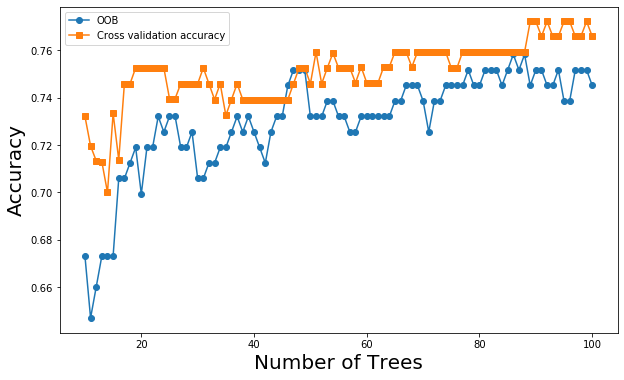

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))
# Plot the equally weighted mean 
plt.plot(trees, scores, label='OOB', marker='o')
# Plot the area weighted mean 
plt.plot(trees, crossv, label='Cross validation accuracy', marker='s')

# Adding labels and title
plt.xlabel('Number of Trees', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# Adding a legend to differentiate the datasets
plt.legend()
plt.show()

In [16]:
print(max_oob_tree, "trees resulted in the best performance with a OOB of", max_oob)

86 trees resulted in the best performance with a OOB of 0.7581699346405228


**H.** After fitting a random forest with 100 trees, plot a map of the entire region of the predicted taxonomy order.

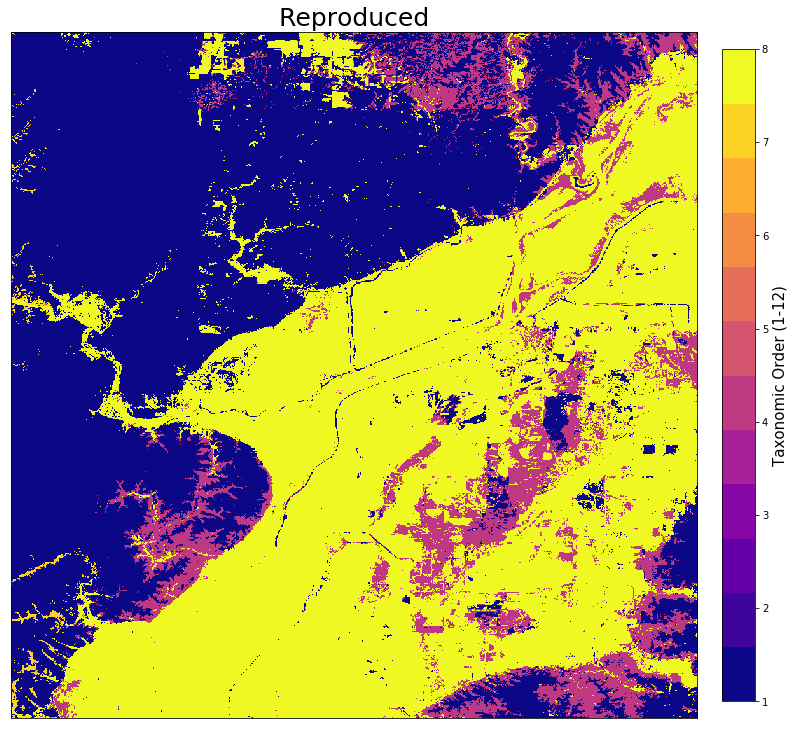

In [17]:
#Predict the classes at each pixel
rfclf_op = sklearn.ensemble.RandomForestClassifier(n_estimators=max_oob_tree, oob_score=True, random_state=rs)
rfclf_op.fit(X,Y)
results = rfclf_op.predict(pred_all).reshape(pred['elevation'].shape)

#Make the figure to compare the original to the reproduced
plt.figure(figsize=(15,15))
plt.title('Reproduced',fontsize=25)
colormap = plt.cm.get_cmap('plasma', 12)
plt.imshow(np.flipud(results), cmap = colormap)
plt.xticks([])
plt.yticks([])

# Add a colorbar (legend) to map integers 1 to 12 to the colors
cb = plt.colorbar(ticks=np.arange(1, 13), shrink = 0.8, pad = 0.03)  # Set ticks to integers from 1 to 12
cb.ax.set_yticklabels(np.arange(1, 13))  # Ensure labels show as integers 1 to 12
cb.set_label('Taxonomic Order (1-12)', fontsize=15)  # Set colorbar label

plt.show()

**I.** Use Principal Component Analysis (PCA) to determine a reduced number of covariates. The exact number of features that you use from PCA is not as important as much as explaining why you use the result that you use. Fit and evaluate the Random Forest fit from the corresponding principal components.

In [18]:
import sklearn.decomposition

X_std = (X - np.mean(X,axis=0))/np.std(X,axis=0)
pca = sklearn.decomposition.PCA(n_components=12)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

[3.74529911e+00 2.94501801e+00 1.97860787e+00 1.34454071e+00
 6.55826963e-01 5.71080098e-01 4.32498796e-01 2.18886853e-01
 1.22204645e-01 4.67298322e-02 1.58412107e-02 2.41327304e-03]


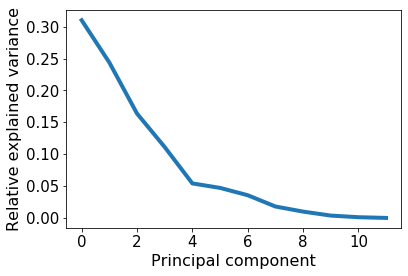

In [19]:
print(pca.explained_variance_) #eigenwavlues 
plt.plot(pca.explained_variance_/np.sum(pca.explained_variance_),lw=4)
plt.ylabel('Relative explained variance',fontsize=16)
plt.xlabel('Principal component',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

According to the figure, the first five components are able to explain more 90% (even about 95%) of the variance. Thus, I chose the first five components to conduct the Random Forest model. 

In [20]:
pca = sklearn.decomposition.PCA(n_components=5)
X_pca = pca.fit_transform(X_std)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Number of components selected: {X_pca.shape[1]}")

Explained variance ratio: [0.31006834 0.24381413 0.16380632 0.11131274 0.05429504]
Number of components selected: 5


In [21]:
#Predict the classes at each pixel
rfclf_pca = sklearn.ensemble.RandomForestClassifier(n_estimators=100, oob_score=True, random_state=rs)
rfclf_pca.fit(X_pca, Y)
print("Out of bag estimate of accuracy: ", rfclf_pca.oob_score_)

Out of bag estimate of accuracy:  0.6993464052287581


The OOB accuracy is 69.9% which is better than 10-fold cross validation on single decision tree classifier. The accuracy is not better than the one obtained from the Random Forest model using all features, but it is expected because the PCA components we used did not explain 100% variances. Some information might be lost during this process. 